# Preliminaries
This notebook has the code to make figures 1 & 2 in the manuscript (and related flux, load, and power plots as a function of concentration).

In [5]:
from simulation import *
from aesthetics import *
from summarize import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

[autoreload of summarize failed: Traceback (most recent call last):
  File "/home/dslochower/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named 'errator'
]
[autoreload of summarize failed: Traceback (most recent call last):
  File "/home/dslochower/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named 'errator'
]
[autoreload of summarize failed: Traceback (most recent call last):
  File "/home/dslochower/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named 'errator'
]


In [ ]:
adk_color = cmap[1]
pka_color = cmap[3]
hiv_10_color = cmap[5]
hiv_200_color = cmap[7]

In [36]:
def plot_flux_vs_concentration(df, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    maximum_flux = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        maximum_flux.append(tmp['Directional flux'].abs().max())
    
    plot_flux_directly = True
    if plot_flux_directly:
        if color:
            ax.plot(concentrations, maximum_flux, 'o', markersize=10, 
                    markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)

        else:
            ax.plot(concentrations, maximum_flux, 'o', markersize=10, 
                    markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    else:
        # Plot the flux divided by the catalytic rate.
        name = str(df.name)
        if 'adk' in name:
            catalytic_rate = 312
        elif 'pka' in name:
            catalytic_rate = 140
        elif 'hiv' in name:
            catalytic_rate = 0.3
        else:
            print('Can\'t guess the system.')
        print('Setting catalytic rate to {} per second'.format(catalytic_rate))
        if color:
            ax.plot(concentrations, [i / catalytic_rate for i in maximum_flux], 'o', markersize=10, 
                    markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)

        else:
            ax.plot(concentrations, [i / catalytic_rate for i in maximum_flux], 'o', markersize=10, 
                    markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])

    ax.set_xlabel('Substrate concentration (M)')
    if plot_flux_directly:
        ax.set_ylabel('Directional flux (cycle s$^{{-1}}$)')
    else:
        ax.set_ylabel('Normalized directional flux (cycle)')
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [7]:
def plot_flux_count_vs_concentration(df, level=1, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    
    print('{:<25} {:<+10.2e} {:<10}'.format('Threshold', level, 'cycle s**-1'))    
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    significant = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        significant.append(sum(tmp['Directional flux'] > level) +
                           sum(tmp['Directional flux'] < -1 * level))
        
    
    if color:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Number of angles > {} cycle s$^{{-1}}$'.format(level))
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [8]:
def plot_reciprocating_flux_vs_concentration(df, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    maximum_flux = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        maximum_flux.append(tmp['Driven flux'].abs().max())
    
    if color:
        ax.plot(concentrations, maximum_flux, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)

    else:
        ax.plot(concentrations, maximum_flux, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Reciprocating flux (cycle s$^{{-1}}$)')
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [10]:
def plot_reciprocating_flux_count_vs_concentration(df, reciprocating_level=1, directional_level=1, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    print('{:<25} {:<+10.2e} {:<10}'.format('Reciprocating flux', reciprocating_level, 'cycle s**-1'))    
    print('{:<25} {:<+10.2e} {:<10}'.format('Directional flux', directional_level, 'cycle s**-1'))    
    
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    significant = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        significant.append(sum((tmp['Driven flux'] > reciprocating_level) & (tmp['Directional flux'].abs() < directional_level)) + 
                           sum((tmp['Driven flux'] < -1 * reciprocating_level) & (tmp['Directional flux'].abs() < directional_level)))
    
    if color:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Number of angles > {} cycle s$^{{-1}}$'.format(reciprocating_level))
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [11]:
def plot_load_vs_concentration(df, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    maximum_load = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        maximum_load.append(tmp['Max load'].abs().max())
    
    if color:
        ax.plot(concentrations, maximum_load, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, maximum_load, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Load at maximum power\n(kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [88]:
def plot_load_count_vs_concentration(df, level=0.01, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    
    print('{:<25} {:<+10.2e} {:<10}'.format('Load threshold', level, 'kcal mol**-1 cycle**-1'))    
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    significant = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        significant.append(sum(tmp['Max load'] > level) +
                           sum(tmp['Max load'] < -1 * level))
    
    if color:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Number of angles > {} kcal mol$^{{-1}}$ cycle$^{{-1}}$'.format(level))
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [14]:
def plot_power_vs_concentration(df, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    maximum_power = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        maximum_power.append(tmp['Max power'].abs().max())

    if color:
        ax.plot(concentrations, maximum_power, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, maximum_power, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
        
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Maximum power (kcal mol$^{{-1}}$ s$^{{-1}}$)')
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [69]:
def plot_power_count_vs_concentration(df, level=0.01, color=None, xmin=10**-7, xmax=10**0,
                                ymin=-10, ymax=80):
    
    print('{:<25} {:<+10.2e} {:<10}'.format('Power threshold', level, 'kcal mol**-1 s**-1'))    
    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax = plt.subplot(gs[0, 0])
    
    concentrations = []
    significant = []
    for concentration in np.unique(df['Concentration'].values):
        tmp = return_concentration_slice(df, concentration)
        concentrations.append(10**concentration)
        significant.append(sum(tmp['Max power'] > level) +
                           sum(tmp['Max power'] < -1 * level))
    
    if color:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=color)
    else:
        ax.plot(concentrations, significant, 'o', markersize=10, 
                markeredgecolor='k', markeredgewidth=1.0, alpha=0.5, mfc=cmap[6])
    
    ax.set_xlabel('Substrate concentration (M)')
    ax.set_ylabel('Number of angles > {} kcal mol$^{{-1}}$ s$^{{-1}}$'.format(level))
    ax.set_xscale('log')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    aesthetics.paper_plot(fig)

In [16]:
def return_concentration_slice(df, concentration):
    tmp = df[np.round(df['Concentration'], 1) ==  np.round(concentration, 1)]
    return tmp

# ADK

First, we load in the data.

In [79]:
adk_scan = pd.read_pickle('adk-concentration-scan.pickle')
adk_counts = pd.read_pickle('adk-concentration-counts.pickle')

In [80]:
adk_scan.name = 'adk'

Setting catalytic rate to 312 per second


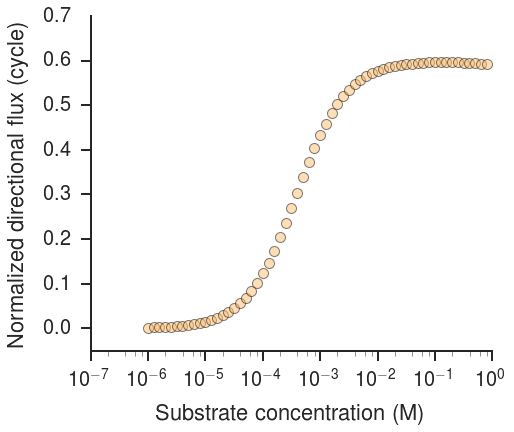

In [227]:
#plot_flux_vs_concentration(adk_scan, ymin=-10, ymax=200)
plot_flux_vs_concentration(adk_scan, ymin=-0.05, ymax=0.7)

Threshold                 +1.00e+00  cycle s**-1


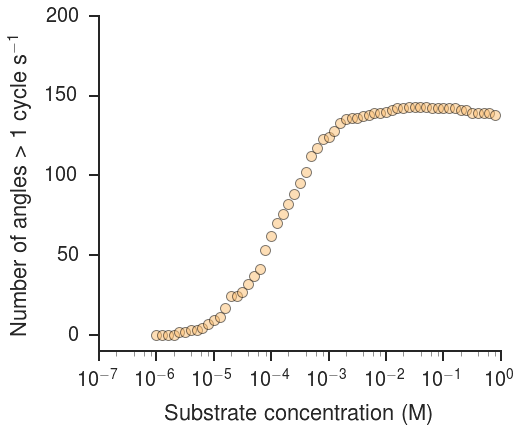

In [37]:
# plot_flux_count_vs_concentration(adk_scan, ymin=-10, ymax=200)
plot_flux_count_vs_concentration(adk_scan, ymin=-10, ymax=200, level=1)

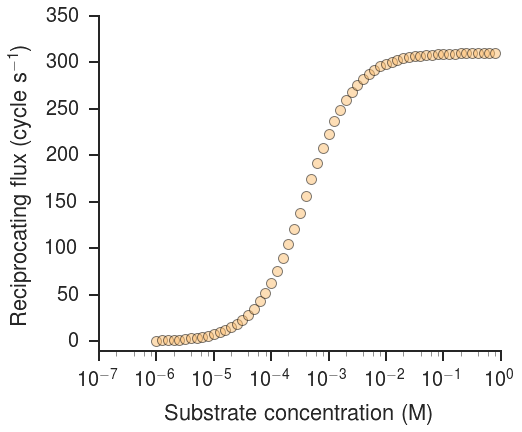

In [120]:
plot_reciprocating_flux_vs_concentration(adk_scan, ymin=-10, ymax=350)

Reciprocating flux        +1.00e+00  cycle s**-1
Directional flux          +1.00e+00  cycle s**-1


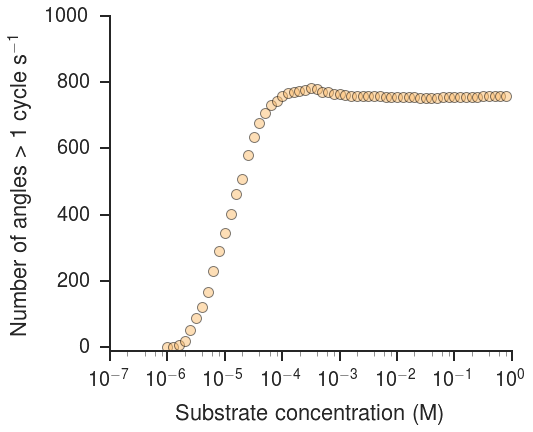

In [160]:
plot_reciprocating_flux_count_vs_concentration(adk_scan, ymin=-10, ymax=1000)

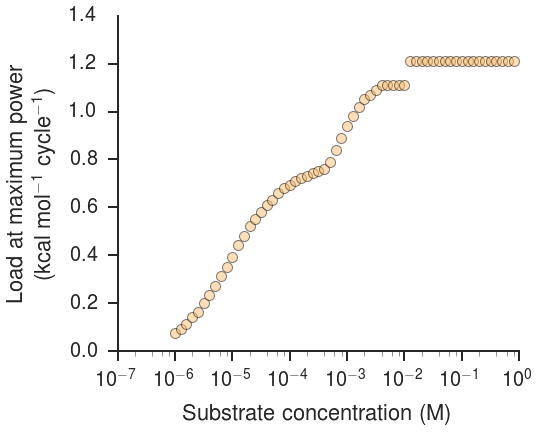

In [263]:
plot_load_vs_concentration(adk_scan, ymin=0, ymax=1.4)

Load threshold            +1.00e-01  kcal mol**-1 cycle**-1


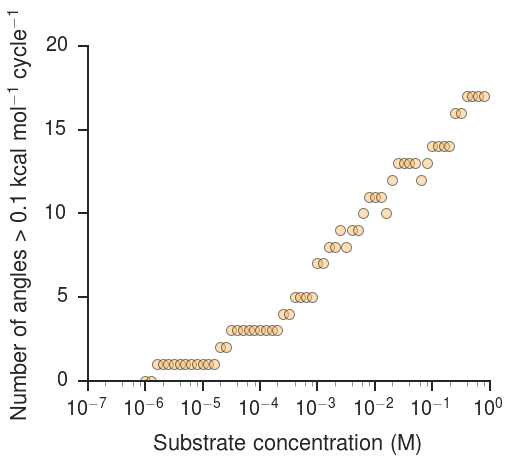

In [90]:
plot_load_count_vs_concentration(adk_scan, level=0.1, ymin=0, ymax=20)

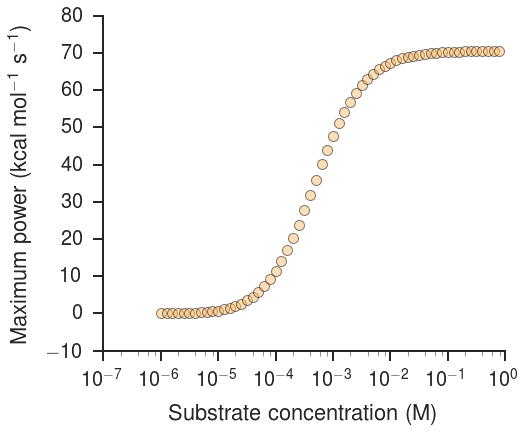

In [100]:
plot_power_vs_concentration(adk_scan, ymin=-10, ymax=80)

Power threshold           +1.00e-01  kcal mol**-1 s**-1


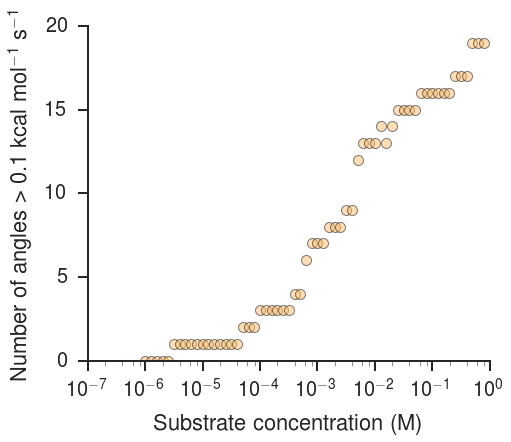

In [83]:
plot_power_count_vs_concentration(adk_scan, ymin=0, ymax=20, level=0.1)

# PKA

In [84]:
pka_scan = pd.read_pickle('pka-concentration-scan.pickle')
pka_counts = pd.read_pickle('pka-concentration-counts.pickle')
pka_scan.name = 'pka'

Load threshold            +1.00e-01  kcal mol**-1 cycle**-1
Power threshold           +1.00e-01  kcal mol**-1 s**-1


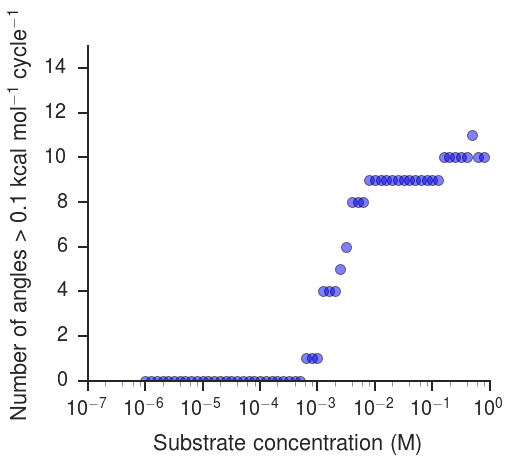

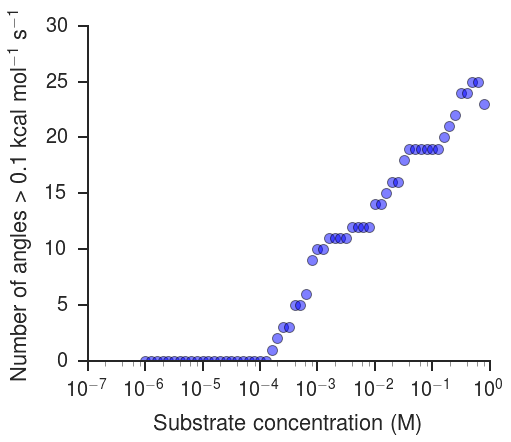

In [93]:
# plot_flux_vs_concentration(pka_scan, color='blue', ymin=-10, ymax=200)
# plot_flux_vs_concentration(pka_scan, color='blue', ymin=-0.05, ymax=0.7)
# plot_flux_count_vs_concentration(pka_scan, color='blue', ymin=-10, ymax=200)
# plot_load_vs_concentration(pka_scan, color='blue', ymin=0, ymax=1.4)
plot_load_count_vs_concentration(pka_scan, color='blue', ymin=0, ymax=15, level=0.1)
# plot_power_vs_concentration(pka_scan, color='blue', ymin=-10, ymax=80)
plot_power_count_vs_concentration(pka_scan, color='blue', ymin=0, ymax=30, level=0.1)

# HIVP

In [71]:
hiv_scan = pd.read_pickle('hiv-concentration-scan.pickle')
hiv_scan.name = 'hiv'
hiv_high = pd.read_pickle('hiv-high-catalytic-rate.pickle')

hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')
hiv_200.name = 'hiv'

Load threshold            +1.00e-01  kcal mol**-1 cycle**-1
Power threshold           +1.00e-01  kcal mol**-1 s**-1


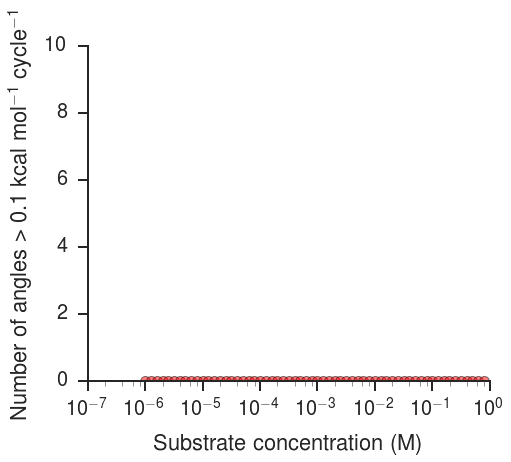

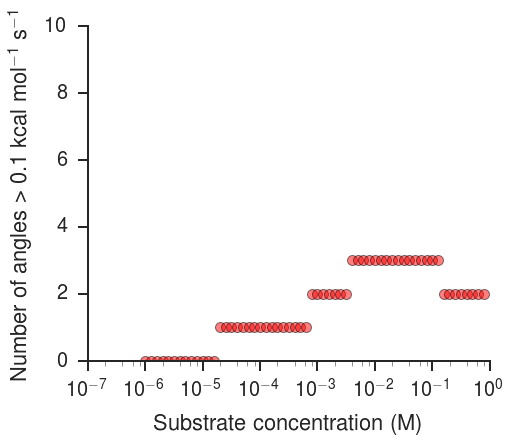

In [94]:
# plot_flux_vs_concentration(hiv_scan, color='red', ymin=0, ymax=2)
# plot_flux_vs_concentration(hiv_scan, color='red', ymin=-0.05, ymax=1.2)
# plot_flux_count_vs_concentration(hiv_scan, color='red', level=0.1, ymin=0, ymax=10)
# plot_reciprocating_flux_vs_concentration(hiv_scan, color='red', ymin=0, ymax=2)
# plot_reciprocating_flux_count_vs_concentration(hiv_scan, color='red', reciprocating_level=1, 
#                                                directional_level=1, ymin=0, ymax=10)

# plot_load_vs_concentration(hiv_scan, color='red', ymin=0, ymax=0.01)
plot_load_count_vs_concentration(hiv_scan, color='red', level=0.1, ymin=0, ymax=10)
# plot_power_vs_concentration(hiv_200, color='red', ymin=0, ymax=30)
plot_power_count_vs_concentration(hiv_200, color='red', level=0.1, ymin=0, ymax=10)

In [185]:
hiv_scan.sort('Directional flux', ascending=False)

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
41506,-1.0,0.693990,2.001532,psiLYS55,0.088157,0.00006,1.773518e-05,55
32541,-2.1,0.574696,2.269746,psiLYS55,0.631380,0.00002,2.203643e-05,55
34986,-1.8,0.378905,1.038935,psiLYS55,0.078230,0.00006,6.653740e-05,55
46396,-0.4,0.378645,1.469634,psiLYS55,0.021460,0.00002,7.762830e-08,55
23576,-3.2,0.305250,0.709733,psiLYS55,0.245681,0.00002,5.264380e-06,55
37431,-1.5,0.302542,1.089715,psiLYS55,0.018579,0.00001,5.970407e-06,55
34171,-1.9,0.273756,0.864848,psiLYS55,0.178223,0.00001,3.983991e-06,55
36616,-1.6,0.267974,0.940174,psiLYS55,0.054025,0.00003,1.418923e-05,55
33356,-2.0,0.267115,1.328939,psiLYS55,0.247280,0.00007,1.748708e-05,55
38246,-1.4,0.218807,1.092158,psiLYS55,0.194022,0.00002,1.477710e-05,55


In [245]:
tmp = return_concentration_slice(adk_scan, -1)

In [246]:
tmp.sort('Directional flux', ascending=True)

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
45482,-1.0,-185.980159,220.066295,chi2THR175,46.743225,-0.00041,0.037915,175
45569,-1.0,-156.970314,308.991142,chi3TYR133,54.756741,-0.81099,70.288483,133
45596,-1.0,-65.502710,256.379132,chi4LYS13,63.312318,-0.00109,0.036176,13
45574,-1.0,-51.159292,128.060102,chi3TYR24,21.658875,-0.00002,0.000550,24
45491,-1.0,-48.529581,82.574514,chi2TYR181,25.479196,-0.00319,0.078574,181
45388,-1.0,-45.708685,85.897082,chi2GLU114,24.110864,-0.00002,0.000347,114
45316,-1.0,-41.350248,152.455522,chi1THR60,37.516023,-0.00012,0.002415,60
45263,-1.0,-32.164355,147.530947,chi1LYS13,62.136132,-0.00139,0.022776,13
45494,-1.0,-31.206862,92.626031,chi2TYR24,30.228313,-0.00053,0.008202,24
45420,-1.0,-28.588750,52.320762,chi2ILE72,17.425741,-0.00015,0.002098,72


In [242]:
adk_scan[adk_scan['File'] == 'chi2THR175']

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
332,-6.0,-0.481869,0.570213,chi2THR175,0.121038,0.00000,0.000000,175
1235,-5.9,-0.606565,0.717249,chi2THR175,0.152290,0.00000,0.000000,175
2138,-5.8,-0.763061,0.902133,chi2THR175,0.191561,0.00000,0.000000,175
3041,-5.7,-0.959491,1.134593,chi2THR175,0.240906,0.00000,0.000000,175
3944,-5.6,-1.206465,1.426272,chi2THR175,0.302885,0.00000,0.000000,175
4847,-5.5,-1.515936,1.794080,chi2THR175,0.380695,0.00000,0.000000,175
5750,-5.4,-1.904219,2.252429,chi2THR175,0.478242,0.00000,0.000000,175
6653,-5.3,-2.391918,2.827954,chi2THR175,0.600465,0.00000,0.000000,175
7556,-5.2,-3.001523,3.547987,chi2THR175,0.753459,0.00000,0.000000,175
8459,-5.1,-3.762420,4.449477,chi2THR175,0.944648,0.00000,0.000000,175


In [111]:
from thresholding import *

In [14]:
thresholds = np.array([0.01, 0.1, 1, 10])

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


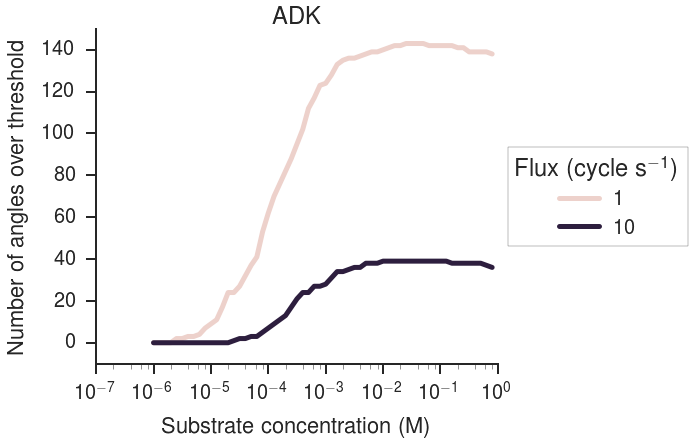

In [45]:
thresholds = np.array([1, 10])
plot_families(adk_scan, thresholds, ymax=150)
plt.title('ADK')

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


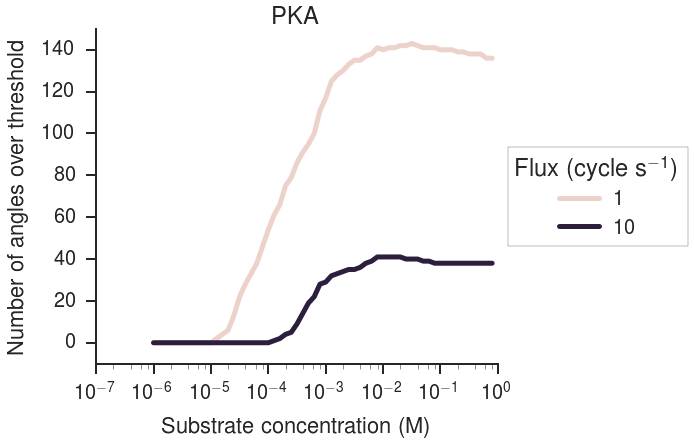

In [49]:
plot_families(pka_scan, thresholds, ymax=150)
plt.title('PKA')

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:34: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


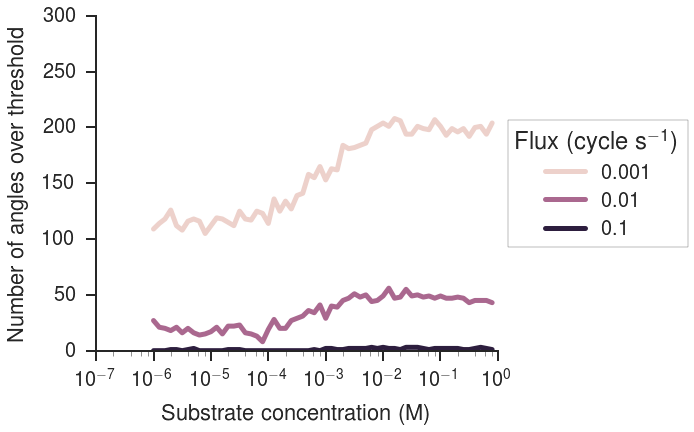

In [251]:
thresholds = np.array([0.001, 0.01, 0.1])
plot_families(hiv_scan, thresholds, ymin=0, ymax=300)

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


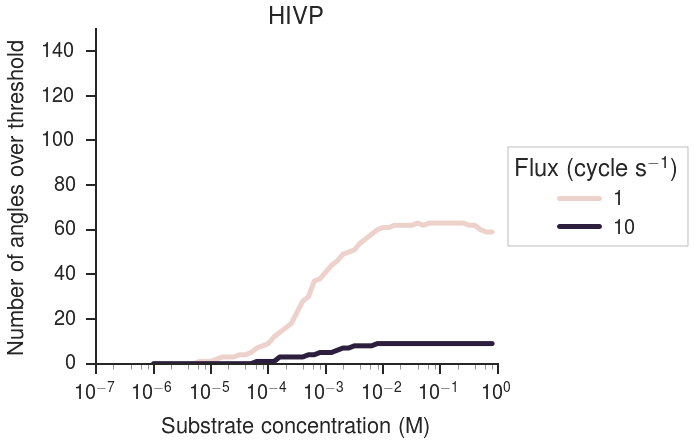

In [51]:
# thresholds = np.array([0.01, 0.1, 1, 10])
hiv_300 = pd.read_pickle('hiv-high-catalytic-rate-300.pickle')
plot_families(hiv_300, thresholds, ymin=0, ymax=150)
plt.title('HIVP')

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:34: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


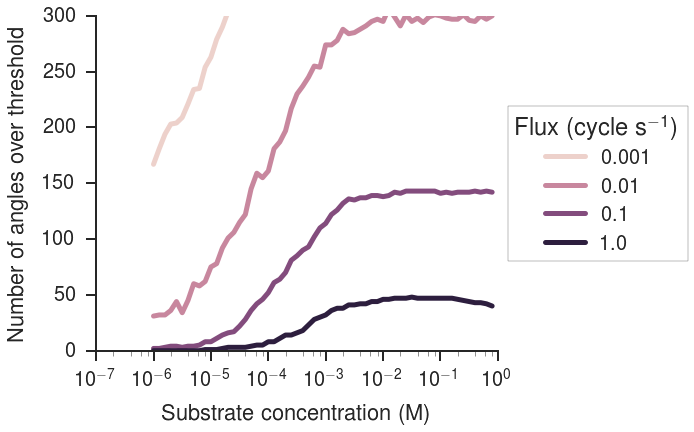

In [41]:
hiv_200 = pd.read_pickle('hiv-high-catalytic-rate-200.pickle')
plot_families(hiv_200, thresholds, ymin=0, ymax=300)

In [39]:
from thresholding import *
thresholds = np.array([0.001, 0.01, 0.1, 1.0])
hiv_200 = pd.read_pickle('hiv-high-catalytic-rate-200.pickle')
save_families(hiv_200, thresholds, 'hiv-catalytic-rate-200-thresholds.csv', 200)

thresholds = np.array([0.001, 0.01, 0.1, 1.0])
hiv_pointthree = pd.read_pickle('hiv_pointthree.pickle')
hiv_pointthree = hiv_pointthree.rename(index=str, columns={"Flux": "Directional flux"})
save_families(hiv_pointthree, thresholds, 'hiv-catalytic-rate-pointthree-thresholds.csv', 0.3)

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


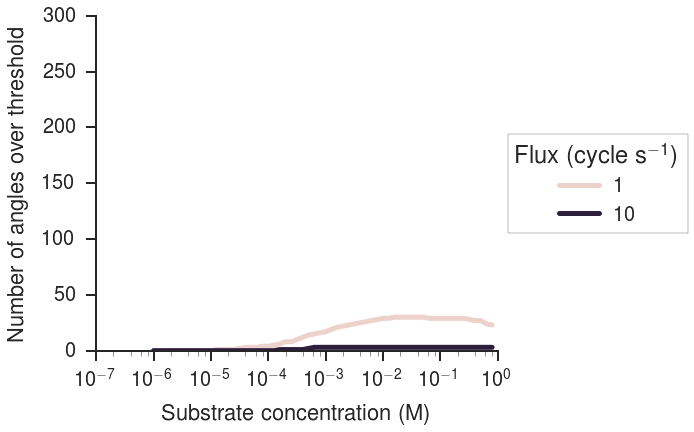

In [61]:
hiv_100 = pd.read_pickle('hiv-high-catalytic-rate-100.pickle')
plot_families(hiv_100, thresholds, ymin=0, ymax=300)

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:57: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  tmp.to_csv(name)


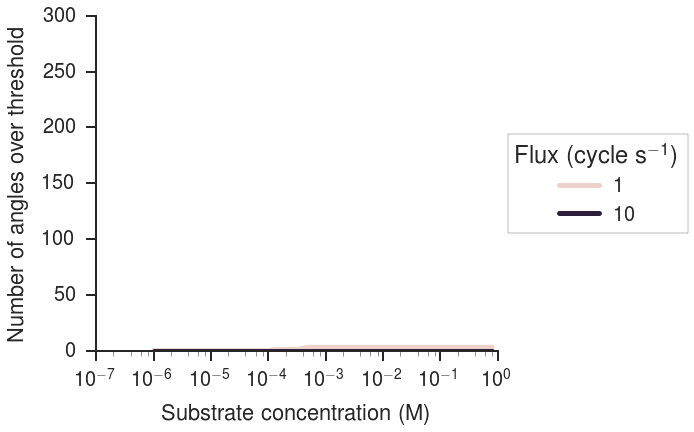

In [169]:
hiv_10 = pd.read_pickle('hiv-high-catalytic-rate-10.pickle')
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')


plot_families(hiv_10, thresholds, ymin=0, ymax=300)

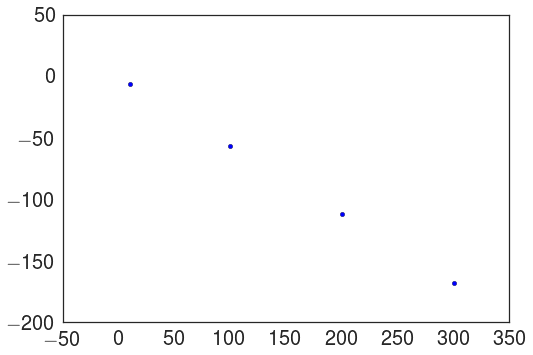

In [288]:
name = 'chi2ASP124'
dfs = [hiv_300, hiv_200, hiv_100, hiv_10]
df = dfs[0]

fluxes = []
for df in dfs:
    tmp = return_concentration_slice(df, -0.1)
    fluxes.append(tmp[tmp['File'] == name]['Directional flux'].values[0])
plt.scatter([300, 200, 100, 10], fluxes)

/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/thresholding.py:34: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ax.plot(x, y, c=cmap[np.where(thresholds==threshold)[0]], label='{}'.format(threshold))


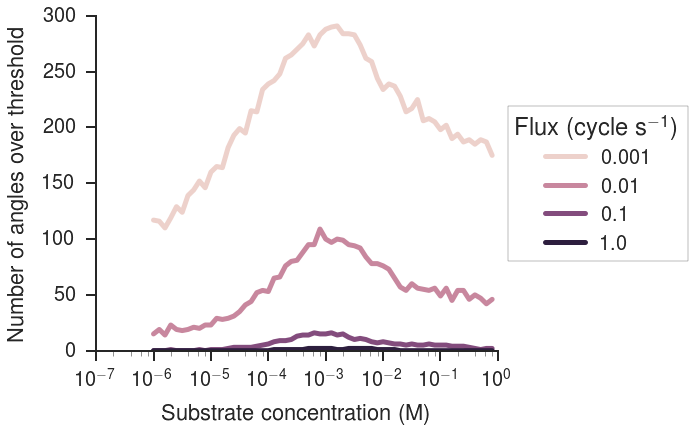

In [37]:
# thresholds = np.array([0.01, 0.1, 1.0, 10.0])
thresholds = np.array([0.001, 0.01, 0.1, 1.0])
hiv_pointthree = pd.read_pickle('hiv_pointthree.pickle')
hiv_pointthree = hiv_pointthree.rename(index=str, columns={"Flux": "Directional flux"})
hiv_pointthree.name = 'hiv'
plot_families(hiv_pointthree, thresholds, ymin=0, ymax=300)

In [38]:
hiv_pointthree.to_csv('hiv-flux-extrapolated-to-point-three.csv')

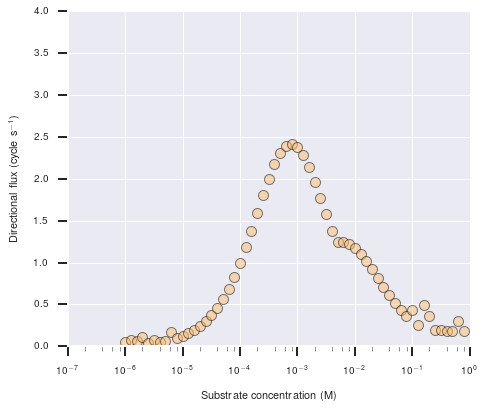

In [34]:
plot_flux_vs_concentration(hiv_pointthree, ymin=0, ymax=4)

In [295]:
hiv_scan[hiv_scan['File'] == name]

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
187,-6.0,-0.000491,0.001412,chi2ASP124,0.000087,0.0,0.0,124
1002,-5.9,-0.000152,0.001293,chi2ASP124,0.000109,0.0,0.0,124
1817,-5.8,-0.000043,0.001049,chi2ASP124,0.000133,0.0,0.0,124
2632,-5.7,-0.000392,0.000895,chi2ASP124,0.000173,0.0,0.0,124
3447,-5.6,-0.000229,0.000951,chi2ASP124,0.000221,0.0,0.0,124
4262,-5.5,-0.001071,0.002201,chi2ASP124,0.000264,0.0,0.0,124
5077,-5.4,-0.000644,0.001451,chi2ASP124,0.000355,0.0,0.0,124
5892,-5.3,-0.001105,0.002258,chi2ASP124,0.000433,0.0,0.0,124
6707,-5.2,-0.002132,0.004325,chi2ASP124,0.000531,0.0,0.0,124
7522,-5.1,-0.002212,0.003295,chi2ASP124,0.000664,0.0,0.0,124


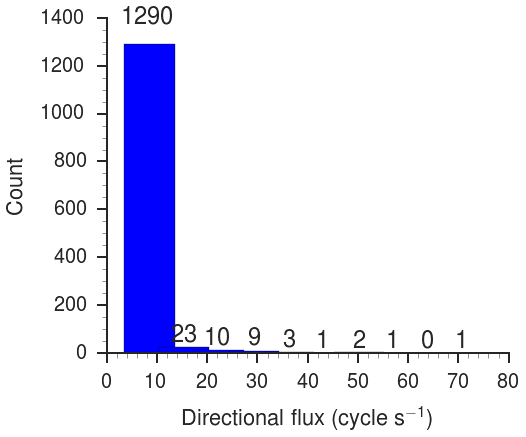

In [181]:
plot_histograms(pka_scan, -0.1, 'blue')

In [18]:
from velocity import *

In [29]:
concentrations = [10**i for i in np.unique(adk_scan['Concentration'].values)]

In [235]:
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('adk_md_data', 'chi2THR175', concentrations)

Concentration = 1e-06
Concentration = 1.2589254117941661e-06
Concentration = 1.584893192461111e-06
Concentration = 1.995262314968875e-06
Concentration = 2.5118864315095717e-06
Concentration = 3.1622776601683665e-06
Concentration = 3.981071705534953e-06
Concentration = 5.0118723362726945e-06
Concentration = 6.3095734448018915e-06
Concentration = 7.943282347242757e-06
Concentration = 9.999999999999918e-06
Concentration = 1.258925411794156e-05
Concentration = 1.584893192461098e-05
Concentration = 1.9952623149688583e-05
Concentration = 2.5118864315095514e-05
Concentration = 3.16227766016834e-05
Concentration = 3.981071705534921e-05
Concentration = 5.011872336272653e-05
Concentration = 6.30957344480184e-05
Concentration = 7.943282347242692e-05
Concentration = 9.999999999999836e-05
Concentration = 0.00012589254117941455
Concentration = 0.0001584893192461085
Concentration = 0.00019952623149688422
Concentration = 0.0002511886431509531
Concentration = 0.0003162277660168315
Concentration = 0.000

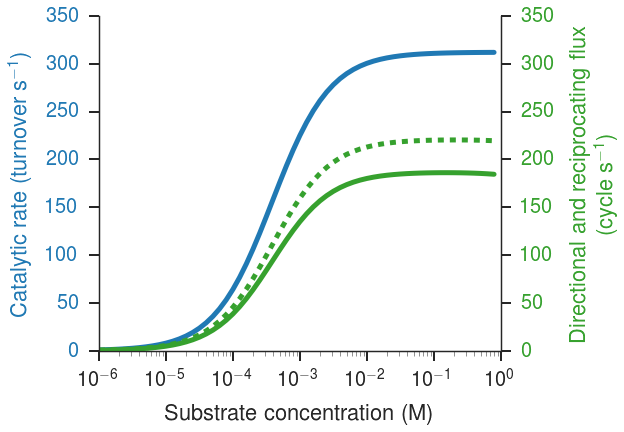

In [238]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=350)

In [213]:
pka_scan[pka_scan['Directional flux'] == pka_scan['Directional flux'].max()]

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
79001,-0.2,42.741365,87.098586,psiSER311,13.939837,0.12099,2.691515,311


In [241]:
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('pka_md_data', 'chi2GLU194', concentrations)

Concentration = 1e-06
Concentration = 1.2589254117941661e-06
Concentration = 1.584893192461111e-06
Concentration = 1.995262314968875e-06
Concentration = 2.5118864315095717e-06
Concentration = 3.1622776601683665e-06
Concentration = 3.981071705534953e-06
Concentration = 5.0118723362726945e-06
Concentration = 6.3095734448018915e-06
Concentration = 7.943282347242757e-06
Concentration = 9.999999999999918e-06
Concentration = 1.258925411794156e-05
Concentration = 1.584893192461098e-05
Concentration = 1.9952623149688583e-05
Concentration = 2.5118864315095514e-05
Concentration = 3.16227766016834e-05
Concentration = 3.981071705534921e-05
Concentration = 5.011872336272653e-05
Concentration = 6.30957344480184e-05
Concentration = 7.943282347242692e-05
Concentration = 9.999999999999836e-05
Concentration = 0.00012589254117941455
Concentration = 0.0001584893192461085
Concentration = 0.00019952623149688422
Concentration = 0.0002511886431509531
Concentration = 0.0003162277660168315
Concentration = 0.000

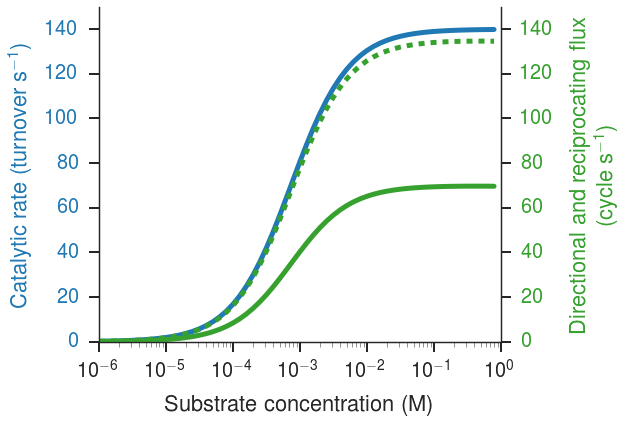

In [242]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=150)

In [217]:
hiv_scan[hiv_scan['Directional flux'] == hiv_scan['Directional flux'].max()]

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
41506,-1.0,0.69399,2.001532,psiLYS55,0.088157,0.00006,0.000018,55


In [30]:
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('hiv_md_data', 'chi2ASP124', concentrations)

Concentration = 1e-06
Concentration = 1.2589254117941661e-06
Concentration = 1.584893192461111e-06
Concentration = 1.995262314968875e-06
Concentration = 2.5118864315095717e-06
Concentration = 3.1622776601683665e-06
Concentration = 3.981071705534953e-06
Concentration = 5.0118723362726945e-06
Concentration = 6.3095734448018915e-06
Concentration = 7.943282347242757e-06
Concentration = 9.999999999999918e-06
Concentration = 1.258925411794156e-05
Concentration = 1.584893192461098e-05
Concentration = 1.9952623149688583e-05
Concentration = 2.5118864315095514e-05
Concentration = 3.16227766016834e-05
Concentration = 3.981071705534921e-05
Concentration = 5.011872336272653e-05
Concentration = 6.30957344480184e-05
Concentration = 7.943282347242692e-05
Concentration = 9.999999999999836e-05
Concentration = 0.00012589254117941455
Concentration = 0.0001584893192461085
Concentration = 0.00019952623149688422
Concentration = 0.0002511886431509531
Concentration = 0.0003162277660168315
Concentration = 0.000

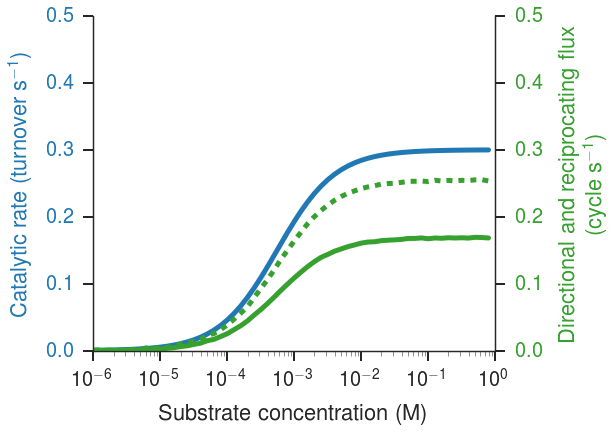

In [38]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=0.5)

A combined, plot families curve...

Directional flux!


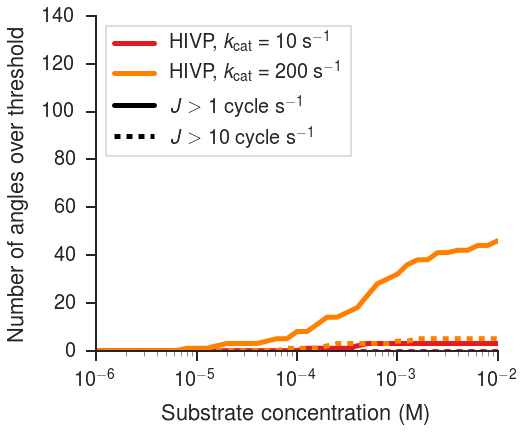

In [200]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)


x, y = find_above_threshold(hiv_10, 1)
ax.plot(x, y, c=cmap[5], ls='-', label=r'HIVP, $k_\text{cat} = 10$ s$^{{-1}}$')
x, y = find_above_threshold(hiv_10, 10)
ax.plot(x, y, c=cmap[5], ls='--')
x, y = find_above_threshold(hiv_200, 1)
ax.plot(x, y, c=cmap[7], ls='-', label=r'HIVP, $k_\text{cat} = 200$ s$^{{-1}}$')
x, y = find_above_threshold(hiv_200, 10)
ax.plot(x, y, c=cmap[7], ls='--')


ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 140])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='-')
anyArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+[r'$J > 1$ cycle s$^{{-1}}$', 
                                                                    '$J > 10$ cycle s$^{{-1}}$'],
         loc='upper left', frameon=True)



# ax.legend(loc='upper left', frameon=True)
# ax.annotate(r'$J > 1$ cycle s$^{{-1}}$', xy=(0.5, 0.5), 
#            xytext=(0.18, 0.73), xycoords='figure fraction', fontsize=20)

aesthetics.paper_plot(fig)
print('Directional flux!')

Reciprocating flux!


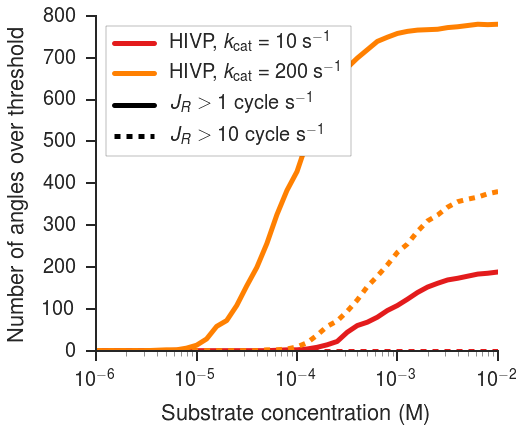

In [201]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)

x, y = find_driven_above_threshold(hiv_10, 1)
ax.plot(x, y, c=cmap[5], ls='-', label=r'HIVP, $k_\text{cat} = 10$ s$^{{-1}}$')
x, y = find_driven_above_threshold(hiv_10, 10)
ax.plot(x, y, c=cmap[5], ls='--')

x, y = find_driven_above_threshold(hiv_200, 1)
ax.plot(x, y, c=cmap[7], ls='-', label=r'HIVP, $k_\text{cat} = 200$ s$^{{-1}}$')
x, y = find_driven_above_threshold(hiv_200, 10)
ax.plot(x, y, c=cmap[7], ls='--')

ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 800])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='-')
anyArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+[r'$J_R > 1$ cycle s$^{{-1}}$', 
                                                                    '$J_R > 10$ cycle s$^{{-1}}$'],
         loc='upper left', frameon=True)

aesthetics.paper_plot(fig)
print('Reciprocating flux!')

Directional flux!


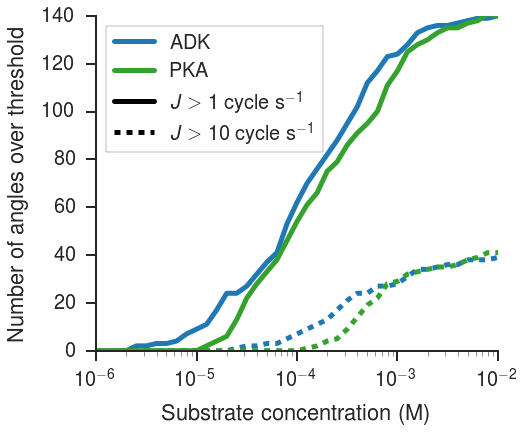

In [202]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)

thresholds = np.array([1, 10])
x, y = find_above_threshold(adk_scan, 1)
ax.plot(x, y, c=cmap[1], ls='-', label='ADK')
x, y = find_above_threshold(adk_scan, 10)
ax.plot(x, y, c=cmap[1], ls='--')
x, y = find_above_threshold(pka_scan, 1)
ax.plot(x, y, c=cmap[3], ls='-', label='PKA')
x, y = find_above_threshold(pka_scan, 10)
ax.plot(x, y, c=cmap[3], ls='--')
# x, y = find_above_threshold(hiv_10, 1)
# ax.step(x, y, c=cmap[5], ls='-', label=r'HIVP, $k_\text{cat} = 10$ s$^{{-1}}$')
# x, y = find_above_threshold(hiv_10, 10)
# ax.step(x, y, c=cmap[5], ls='--')

# x, y = find_above_threshold(hiv_200, 1)
# ax.step(x, y, c=cmap[7], ls='-', label=r'HIVP, $k_\text{cat} = 200$ s$^{{-1}}$')
# x, y = find_above_threshold(hiv_200, 10)
# ax.step(x, y, c=cmap[7], ls='--')


ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 140])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='-')
anyArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+[r'$J > 1$ cycle s$^{{-1}}$', 
                                                                    '$J > 10$ cycle s$^{{-1}}$'],
         loc='upper left', frameon=True)



# ax.legend(loc='upper left', frameon=True)
# ax.annotate(r'$J > 1$ cycle s$^{{-1}}$', xy=(0.5, 0.5), 
#            xytext=(0.18, 0.73), xycoords='figure fraction', fontsize=20)

aesthetics.paper_plot(fig)
print('Directional flux!')

Reciprocating flux!


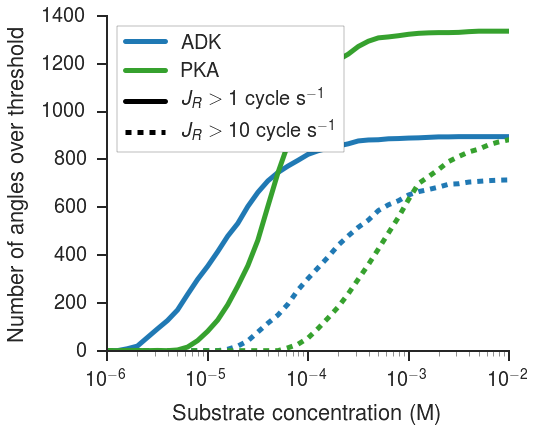

In [206]:

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)

x, y = find_driven_above_threshold(adk_scan, 1)
ax.plot(x, y, c=cmap[1], ls='-', label='ADK')
x, y = find_driven_above_threshold(adk_scan, 10)
ax.plot(x, y, c=cmap[1], ls='--')
x, y = find_driven_above_threshold(pka_scan, 1)
ax.plot(x, y, c=cmap[3], ls='-', label='PKA')
x, y = find_driven_above_threshold(pka_scan, 10)
ax.plot(x, y, c=cmap[3], ls='--')

ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 1400])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='-')
anyArtist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+[r'$J_R > 1$ cycle s$^{{-1}}$', 
                                                                    '$J_R > 10$ cycle s$^{{-1}}$'],
         loc='upper left', frameon=True)



# ax.legend(loc='upper left', frameon=True)
# ax.annotate(r'$J > 1$ cycle s$^{{-1}}$', xy=(0.5, 0.5), 
#            xytext=(0.18, 0.73), xycoords='figure fraction', fontsize=20)

aesthetics.paper_plot(fig)
print('Reciprocating flux!')

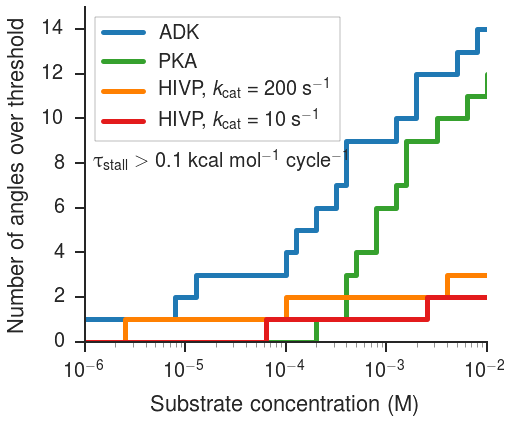

In [181]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)


x, y = find_stall_above_threshold(adk_scan, 0.1)
ax.step(x, y, c=cmap[1], ls='-', label='ADK')
#x, y = find_above_threshold(adk_scan, 10)
#ax.plot(x, y, c=cmap[1], ls='--')
x, y = find_stall_above_threshold(pka_scan, 0.1)
ax.step(x, y, c=cmap[3], ls='-', label='PKA')
#x, y = find_above_threshold(pka_scan, 10)
#ax.plot(x, y, c=cmap[3], ls='--')
x, y = find_stall_above_threshold(hiv_200, 0.1)
ax.step(x, y, c=cmap[7], ls='-', label=r'HIVP, $k_\text{cat} = 200$ s$^{{-1}}$')
x, y = find_stall_above_threshold(hiv_10, 0.1)
ax.step(x, y, c=cmap[5], ls='-', label=r'HIVP, $k_\text{cat} = 10$ s$^{{-1}}$')


ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 15])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')
ax.legend(loc='upper left', frameon=True)
ax.annotate(r'$\tau_\text{{stall}} > 0.1$ kcal mol$^{{-1}}$ cycle$^{{-1}}$', xy=(0.5, 0.5), 
            xytext=(0.18, 0.6), xycoords='figure fraction', fontsize=20)

aesthetics.paper_plot(fig)

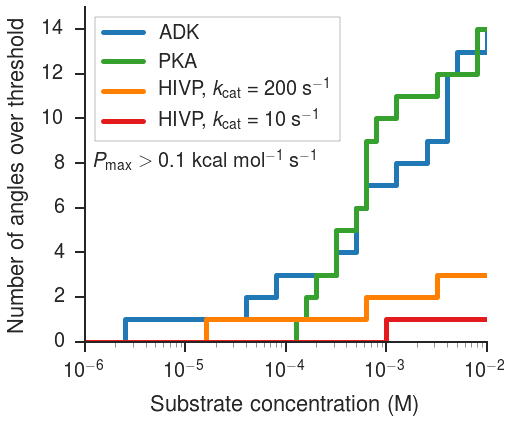

In [182]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)

x, y = find_power_above_threshold(adk_scan, 0.1)
ax.step(x, y, c=cmap[1], ls='-', label='ADK')
#x, y = find_above_threshold(adk_scan, 10)
#ax.plot(x, y, c=cmap[1], ls='--')
x, y = find_power_above_threshold(pka_scan, 0.1)
ax.step(x, y, c=cmap[3], ls='-', label='PKA')
#x, y = find_above_threshold(pka_scan, 10)
#ax.plot(x, y, c=cmap[3], ls='--')
x, y = find_power_above_threshold(hiv_200, 0.1)
ax.step(x, y, c=cmap[7], ls='-', label=r'HIVP, $k_\text{cat} = 200$ s$^{{-1}}$')
x, y = find_power_above_threshold(hiv_10, 0.1)
ax.step(x, y, c=cmap[5], ls='-', label=r'HIVP, $k_\text{cat} = 10$ s$^{{-1}}$')


ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number of angles over threshold')
ax.set_xscale('log')
ax.set_xlim([10**-6, 10**-2])
ax.set_ylim([0, 15])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='Flux (cycle s$^{{-1}}$)')
ax.legend(loc='upper left', frameon=True)
ax.annotate(r'$P_\text{{max}} > 0.1$ kcal mol$^{{-1}}$ s$^{{-1}}$', xy=(0.5, 0.5), 
            xytext=(0.18, 0.6), xycoords='figure fraction', fontsize=20)

aesthetics.paper_plot(fig)

In [174]:
sum(hiv_10['Max load'].abs() > 0.1)

33

In [187]:
max(pka_scan['Max load'].abs() * 2)

1.6019800000000013

In [188]:
max(adk_scan['Max load'].abs() * 2)

2.4219800000000018

In [189]:
max(pka_scan['Max power'].abs())

28.491999217924167

In [190]:
max(adk_scan['Max power'].abs())

70.497966560164627

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second**-1
-----------------         ---------  --------- 
Intrasurface flux         -1.35e+02  cycle second**-1
Peak intrasurface flux    +1.59e+02  cycle second**-1
Intersurface flux         +6.83e-06  cycle second**-1


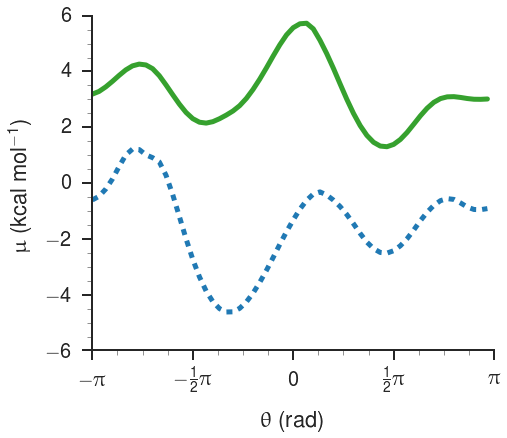

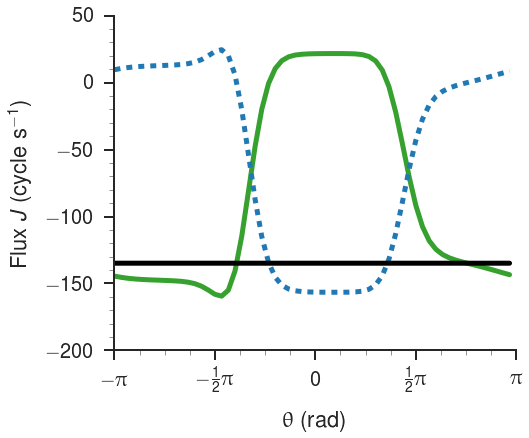

In [224]:
this = simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.cSubstrate = 1e-3
this.simulate()
this.plot_energy()
this.plot_flux()
